In [73]:
from pprint import pprint
from numpy import diag, diagflat, dot

alpha = 1
beta = 2
Ce = 0.1
Cd = 0
nos_internos = 4


def constante_pvc(alpha, beta, nos_interior):
    D = alpha * (10**-6)
    k = beta * (10**-6)
    return (2 + ((((nos_interior+1)**2) * k) / D))


def gauss_jacobi(matriz_A, matriz_x, matriz_b, nos_interior):
   
    matriz_D = diag(matriz_A)
    matriz_R = matriz_A - diagflat(matriz_D)

    for i in range(10):
        matriz_x = (matriz_b - dot(matriz_R,matriz_x)) / matriz_D

    return matriz_x


def sistema_pvc(nos_interior):

    linha_A = [0] * nos_interior
    matriz_A = [linha_A] * nos_interior
    matriz_b = []
    matriz_x = []
    a = -1
    b = 0
    # deltaX = nos_internos + 1

    for l in range(nos_interior):
        linha = []
        for c in range(nos_interior):
            if c == l:
                linha.append(constante_pvc(alpha, beta, nos_interior))
            elif (c == l - 1) | (c - 1 == l):
                linha.append(a)
            else:
                linha.append(b)
        matriz_A[l] = linha

    print("\nMatriz A:")
    pprint(matriz_A)

    for l  in range(nos_interior):
        if (l == 0):
            matriz_b.append(Ce)
        elif (l == nos_internos-1):
            matriz_b.append(Cd)
        else:
            matriz_b.append(0)

    print("\nMatriz b:")
    print(matriz_b)

    for l  in range(nos_interior):
        matriz_x.append(1)
    
    print("\nMatriz x:")
    print(matriz_x)


    matriz_solucao = gauss_jacobi(matriz_A, matriz_x, matriz_b, nos_interior)
    print("\nMatriz solucao:")

    i=2
    j=0
    while(i <= nos_interior+1):
        print("C{} = {}".format(i, matriz_solucao[j]))
        i+=1
        j+=1

    vetor_solucao = [Ce]
    for i in range(nos_interior):
        vetor_solucao.append(matriz_solucao[i])
    vetor_solucao.append(Cd)

    return vetor_solucao

        
resultadoPVC = sistema_pvc(nos_internos)


Matriz A:
[[52.0, -1, 0, 0], [-1, 52.0, -1, 0], [0, -1, 52.0, -1], [0, 0, -1, 52.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.001923788646684639
C3 = 3.7009627570224883e-05
C4 = 7.119869168666427e-07
C5 = 1.3692056690114523e-08


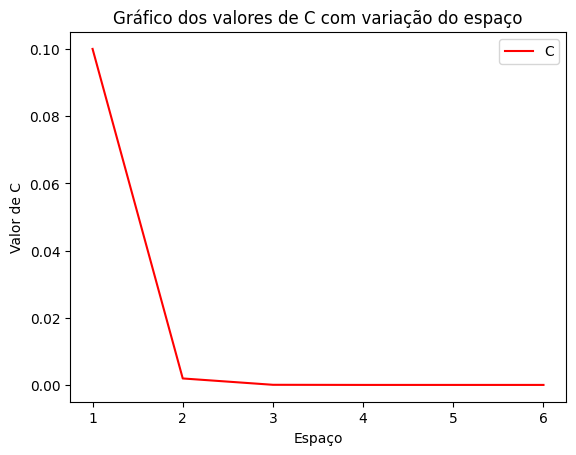

In [74]:
import matplotlib.pyplot as plt

vetor_x = []
z=1

while(z <= nos_internos+2):
    vetor_x.append(z)
    z+=1

def grafico_PVC():

    plt.title('Gráfico dos valores de C com variação do espaço')
    plt.plot(vetor_x, resultadoPVC, color='red', label='C')
    plt.legend()
    plt.xlabel("Espaço")
    plt.ylabel("Valor de C")
    plt.show()

grafico_PVC()


Resultados para nos internos = 4

Matriz A:
[[52.0, -1, 0, 0], [-1, 52.0, -1, 0], [0, -1, 52.0, -1], [0, 0, -1, 52.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.001923788646684639
C3 = 3.7009627570224883e-05
C4 = 7.119869168666427e-07
C5 = 1.3692056690114523e-08

Resultados para nos internos = 6

Matriz A:
[[100.0, -1, 0, 0, 0, 0],
 [-1, 100.0, -1, 0, 0, 0],
 [0, -1, 100.0, -1, 0, 0],
 [0, 0, -1, 100.0, -1, 0],
 [0, 0, 0, -1, 100.0, -1],
 [0, 0, 0, 0, -1, 100.0]]

Matriz b:
[0.1, 0, 0, 0, 0, 0]

Matriz x:
[1, 1, 1, 1, 1, 1]

Matriz solucao:
C2 = 0.0010001000200050034
C3 = 1.0002000500143563e-05
C4 = 1.0003000900720999e-07
C5 = 1.000400144457e-09
C6 = 1.0005005420000003e-11
C7 = 1.00051989e-13

Resultados para nos internos = 8

Matriz A:
[[164.0, -1, 0, 0, 0, 0, 0, 0],
 [-1, 164.0, -1, 0, 0, 0, 0, 0],
 [0, -1, 164.0, -1, 0, 0, 0, 0],
 [0, 0, -1, 164.0, -1, 0, 0, 0],
 [0, 0, 0, -1, 164.0, -1, 0, 0],
 [0, 0, 0, 0, -1, 164.0, -1, 0],
 [0, 0, 0, 0, 0, -1, 16

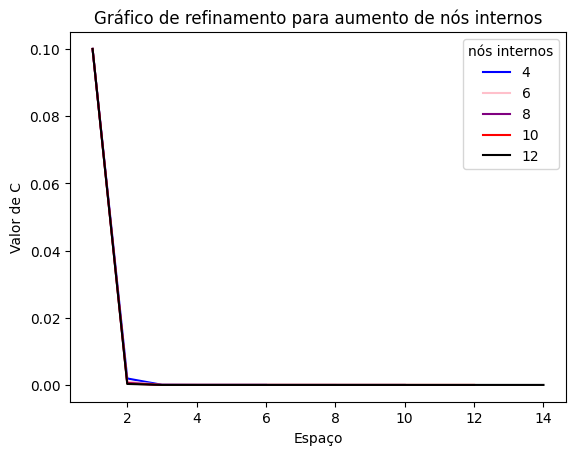

In [77]:
def refinamento():
    vetor_nos_internos = [nos_internos]
    
    for i in range (0,4):
        vetor_nos_internos.append(vetor_nos_internos[i]+2)

    
    ######## AREA GRAFICO ##########

    for i in range (0,5):
        z=1
        vetor_x = []
        while(z <= vetor_nos_internos[i]+2):
            vetor_x.append(z)
            z+=1
        cor = ['blue', 'pink', 'purple', 'red', 'black']
        print("\nResultados para nos internos = {}".format(vetor_nos_internos[i]))
        resultados_PVC = sistema_pvc(vetor_nos_internos[i])
        plt.title('Gráfico dos valores de C com variação do espaço')
        plt.plot(vetor_x, resultados_PVC, color=cor[i], label=vetor_nos_internos[i])
        plt.legend(title="nós internos")
        plt.xlabel("Espaço")
        plt.ylabel("Valor de C")


    plt.title('Gráfico de refinamento para aumento de nós internos')
    plt.show()  
    

refinamento()